# Make Your Own Logo for Free Using AI 
No coding background needed!

## Generating the Logo
We're going to use [Google Colab notebook](https://colab.research.google.com/drive/1xlq5njaE2tttDP5JVI3aYJIoPOhJL-CB?usp=sharing) to generate images. 
  
It's a model that uses "[CLIP](https://openai.com/blog/clip/)" to find a seed image based on a phrase you enter. This is combined with "[VQGAN](https://compvis.github.io/taming-transformers/)" alter the image to match your seed pharse.  
  
The link to a tutorial the Google Colab notebook is broken so I would recommend you use [Max Woolf's blog post](https://minimaxir.com/2021/08/vqgan-clip/) as a guide to what is going on. It's excellent and he a great follow

See [YouTube video](https://youtu.be/KhmOJzCmu1o) for guide to this Notebook and the Postprocessing notebook

Logo Seeds:  
- mouse looking one "flannel cartoon guy" 777250690090243910 1800 iterations
    - ![](https://github.com/rogerfitz/tutorials/blob/master/ai_logo_design/media/ezgif-2-1c869aeb5b.gif?raw=true])
- blue flannel 
    - Using texts: ['flannel guy logo']
    - Using seed: 16242647591107448384
    - ![](https://github.com/rogerfitz/tutorials/blob/master/ai_logo_design/media/logo%20candidate%202.png?raw=true])
- panda thingy
    - Using texts: ['flannel guy logo']
    - Using seed: 12856703653668097238
    - ![](https://github.com/rogerfitz/tutorials/blob/master/ai_logo_design/media/logo%20candidate%204-1.png?raw=True])
- craft beer logo
    - Using texts: ['flannel panda craft beer logo']
    - Using seed: 6685483662293727069  
    - ![](https://github.com/rogerfitz/tutorials/blob/master/ai_logo_design/media/craft%20beer%20logo.png?raw=True])
  
- Hipster Logo
    - Using texts: ['hipster bear logo']
    - Using seed: 8976807152189909148
    - ![](https://github.com/rogerfitz/tutorials/blob/master/ai_logo_design/media/logo%20candidate%206-1.png?raw=True])


# ADVICE
- Try out different phrases
- You can use " | " to optimize for multiple phrases at once. Example "Panda | company logo"
- Save your random seeds, phrases, and any other configurations you change. I lost the ones for my favorite panda design I generated. Save everything because something you didn't like before may grow on you later
- Try out nudging the AI by using icons like [Max Woolf mentions](https://minimaxir.com/2021/08/vqgan-clip/). Using font-awesome icons (I think I will turn that project into a pip installable one in a later vid. 

# Postprocessing

Once you have a good design ready you can clean out the background adding transparency to make it a proper logo. 
- basic thresholding to touchup the background
- Upsampling (taking small resolution pictures and making them bigger)
- Using free and open source GIMP to touch up the image for your own branding materials
  
You may need to hire a designer to help you follow the AI's lead if your graphic design skills aren't great. I find the settings the AI generates the most interesting but sometimes they need a lot of help.


In [14]:
import numpy as np
import cv2 as cv, cv2
import matplotlib.pyplot as plt

import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline


image = cv.imread("media/panda logo.png")

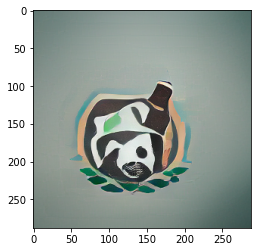

In [15]:
plt.imshow(image[:,:,::-1])

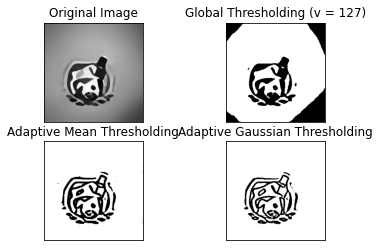

In [16]:
img=image.copy()

img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img = cv.medianBlur(img,7)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

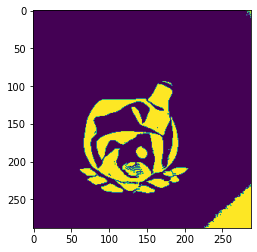

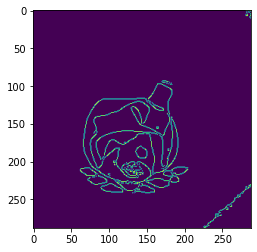

In [22]:

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray = cv.medianBlur(img,3)#Smooth out errantpixels
t=100
ret, thresh = cv2.threshold(gray,t,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh)
plt.show()

# Canny Edge detection
canny = cv2.Canny(thresh, 0, t)
plt.imshow(canny)
plt.show()

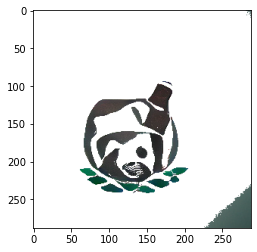

In [23]:
color_swapped=image.copy()
color_swapped[thresh<100]=255
plt.imshow(color_swapped[:,:,::-1])

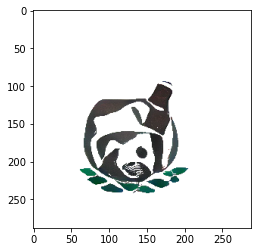

In [24]:
#Fix corners
color_swapped[225:,225:,]=255
color_swapped[:10,225:,]=255
plt.imshow(color_swapped[:,:,::-1])

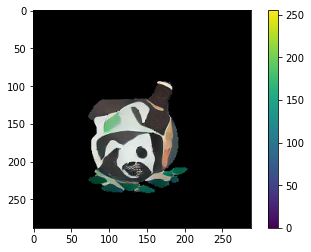

(<matplotlib.image.AxesImage at 0x15f680b70d0>,
 None)

In [7]:
#Grabcut is another approach like the "fuzzy wand" select tool in GIMP. 
#Here's how to use it below, I'd recommend just using GIMP instead.
img=image.copy()
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (73,50,225,290)#box surrounding our image
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img[:,:,::-1]),plt.colorbar(),plt.show()

In [8]:
#to write the image
cv.imwrite("media/panda logo color_swapped.png", color_swapped)

True

To touchup my logo I followed this [GIMP tutorial](https://www.youtube.com/watch?v=lOzSiOIipSM)


## Upsample

I found this tutorial to be excellent: https://learnopencv.com/super-resolution-in-opencv/ For our purposes, one image upsample, no speed concerns, we can use EDSR_x4

In [25]:
sr = cv.dnn_superres.DnnSuperResImpl_create()

path = "EDSR_x4.pb"

sr.readModel(path)

sr.setModel("edsr",4)

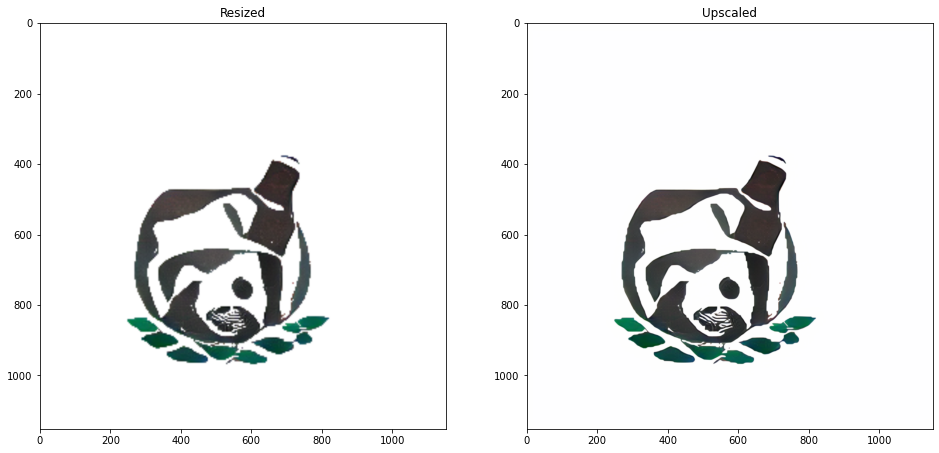

In [10]:


image=cv2.imread("media/panda logo color_swapped.png")
#image=cv2.imread("media/panda logo.png")

upscaled = sr.upsample(image)

# Resized image
resized = cv.resize(image,dsize=None,fx=4,fy=4)

plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
# OpenCV resized
plt.title("Resized")
plt.imshow(resized[:,:,::-1])

# SR upscaled
plt.subplot(1,2,2)
plt.imshow(upscaled[:,:,::-1])
plt.title("Upscaled")
plt.show()



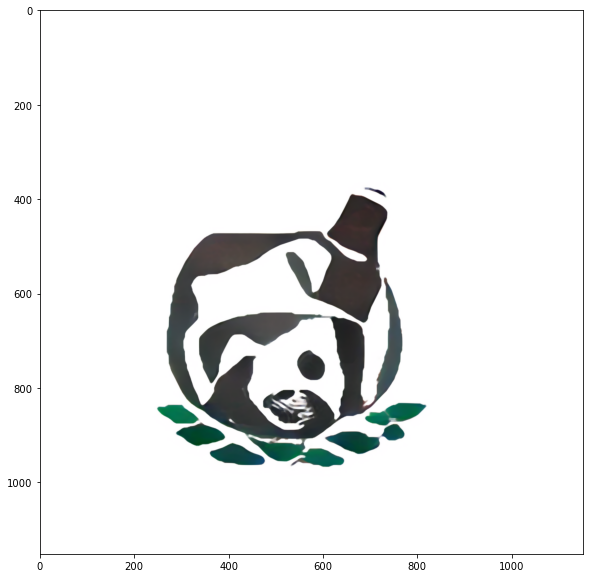

In [11]:
#Remove errant pixels using median blur
plt.figure(figsize=(16,10))
color_swapped_pixel_fixed=cv2.medianBlur(upscaled,7)
plt.imshow(color_swapped_pixel_fixed[:,:,::-1])

In [12]:
image_bgr=color_swapped_pixel_fixed.copy()
h, w, c = image_bgr.shape
# append Alpha channel -- required for BGRA (Blue, Green, Red, Alpha)
image_bgra = np.concatenate([image_bgr, np.full((h, w, 1), 255, dtype=np.uint8)], axis=-1)
# create a mask where white pixels ([250,250,250]) are True
white = np.all(image_bgr >= [250, 250, 250], axis=-1)
# change the values of Alpha to 0 for all the white pixels
image_bgra[white, -1] = 0
cv2.imwrite('media/image_bgra.png', image_bgra)

True

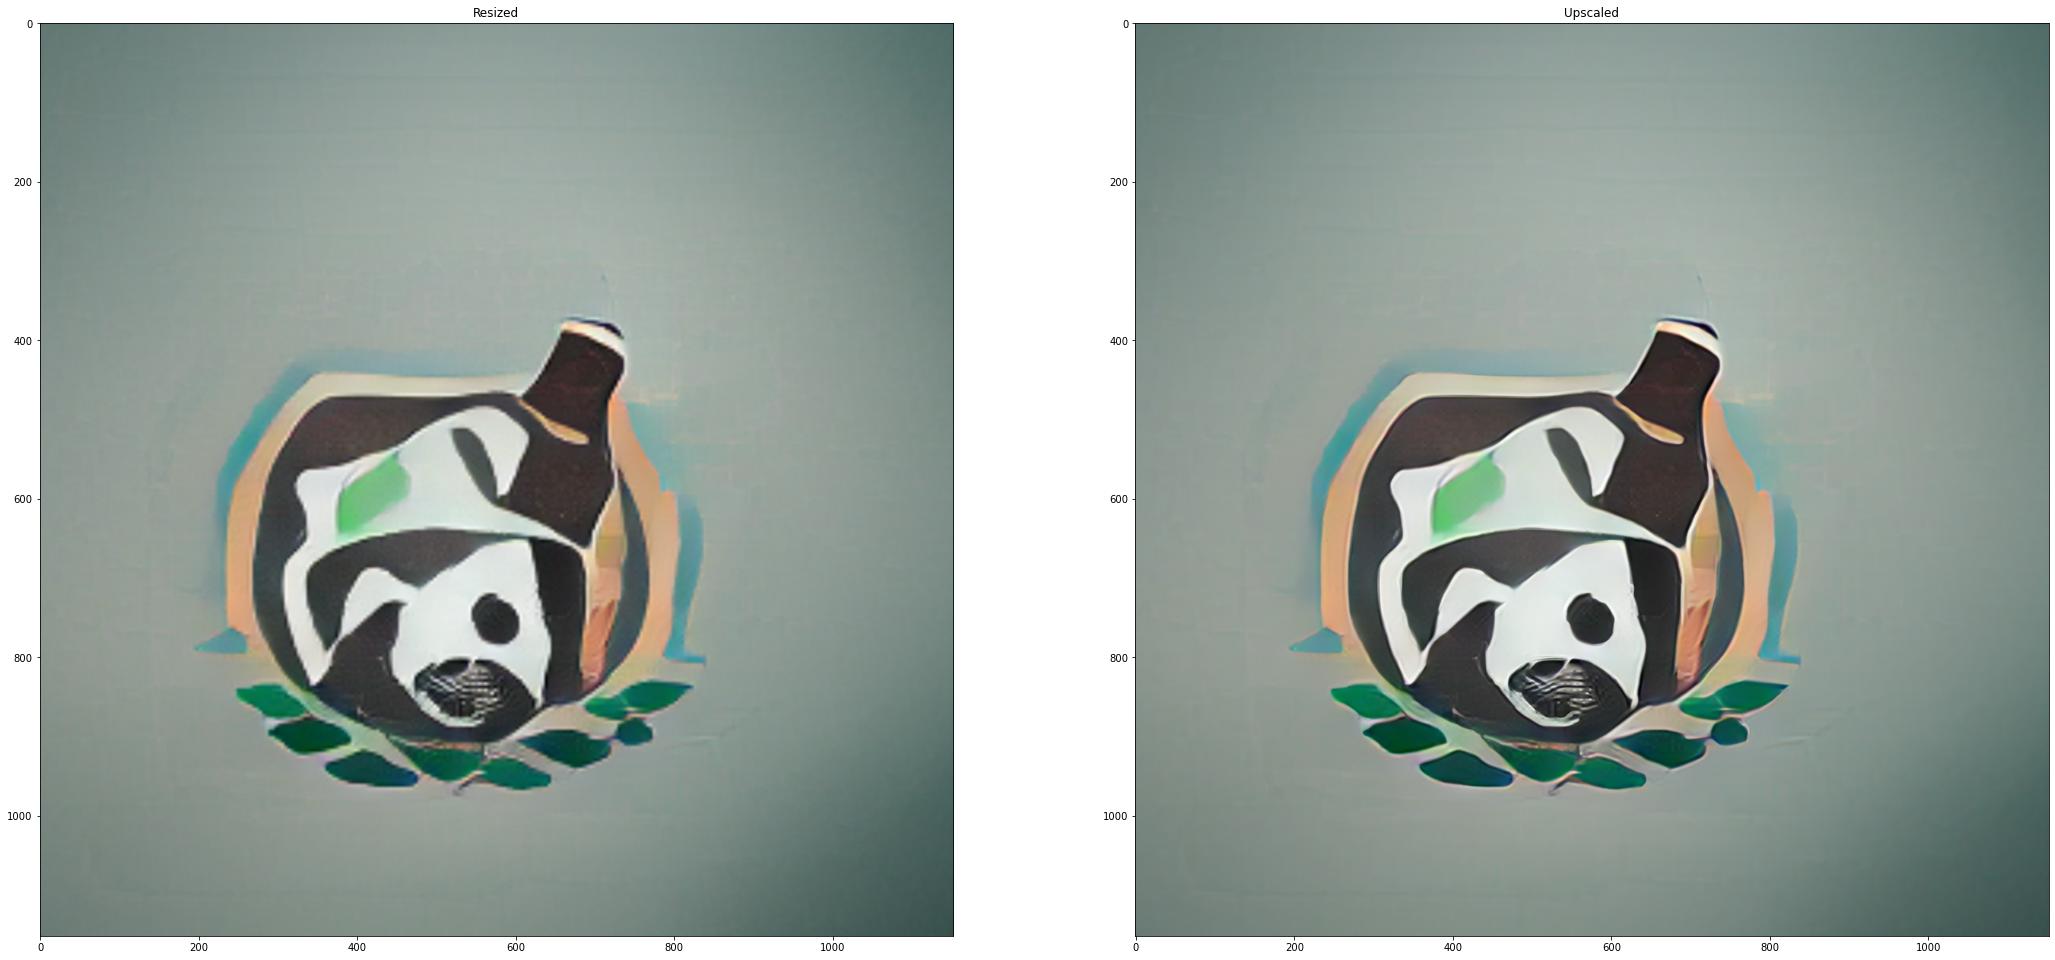

True

In [31]:
image=cv2.imread("media/panda logo.png")

upscaled = sr.upsample(image)

# Resized image
resized = cv.resize(image,dsize=None,fx=4,fy=4)

plt.figure(figsize=(36,20))
plt.subplot(1,2,1)
# OpenCV resized
plt.title("Resized")
plt.imshow(resized[:,:,::-1])
cv2.imwrite("media/panda logo resized.png", resized)

# SR upscaled
plt.subplot(1,2,2)
plt.imshow(upscaled[:,:,::-1])
plt.title("Upscaled")
plt.show()
cv2.imwrite("media/panda logo upscaled.png", upscaled)

# Add to T-Shirt

Make your own shirt and branding materials! 

![](https://github.com/rogerfitz/tutorials/blob/master/ai_logo_design/media/T-shirt.PNG?raw=True])

https://www.rushordertees.com/design/?design=Njg0MjQ5OQ==&utm_medium=share_link&utm_source=share_link&utm_campaign=share_link

# Thoughts on AI Images
AI does a great job at creating concepts but you'll likely still need some graphic designer to help touch up the images. Upsampling is pretty good with AI, removing the background is tougher. Use [GIMP](https://www.gimp.org/) because having an edit UI using a mouse is much easier to work with then coding things like that on the computer. Over time you can get the computer better at postprocessing through an interface. 
  
If I was making this for a client I would create a UI like:  

![AI CMS](https://github.com/rogerfitz/tutorials/blob/master/ai_logo_design/media/AI%20CMS%20for%20Training.PNG?raw=true])

The base and AI postprocessed image would be available for the designer to start from. After finishing the design, the designer could upload this image to the webserver with some edit notes to help train the AI model to do a better job going from base to final.

Share your designs! Let me know how this worked for you